In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
 x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [5]:
#y = mx+b b = 5
y_true = (0.5*x_data)+5+noise

In [8]:
x_df = pd.DataFrame(data = x_data,columns=['X-Data'])

In [9]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [12]:
my_data = pd.concat([x_df,y_df],axis=1)

In [13]:
my_data.head()

,X-Data,Y
0,0.00000,5.391540
1,0.00001,3.911032
2,0.00002,6.182868
3,0.00003,7.263453
4,0.00004,3.951791


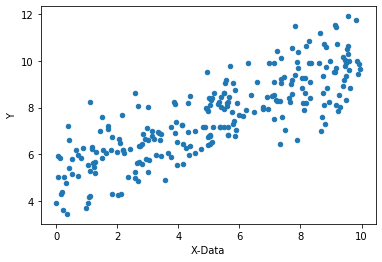

In [15]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')

In [16]:
batch_size = 8

In [17]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [19]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])
yph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [22]:
# Model 
y_model = m*xph + b

In [26]:
# Cost Function
error = tf.reduce_sum(tf.square(yph-y_model))

In [38]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [39]:
init = tf.global_variables_initializer()

In [43]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

In [45]:
model_b

4.997088

In [46]:
y_hat = x_data*model_m+model_b

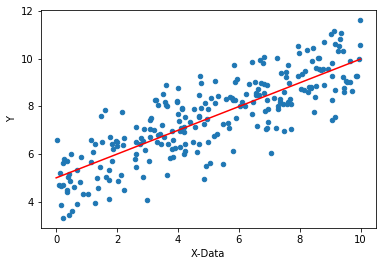

In [49]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(x_data,y_hat,'r')